In [45]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten, Dropout

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 159s 14us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

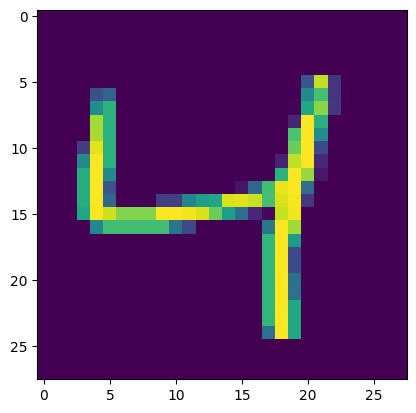

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [42]:
# Normalization 
X_train = X_train/255.0
X_test = X_test/255.0

In [43]:
X_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [46]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


In [47]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235

In [48]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [49]:
history = model.fit( X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/20
375/375 [==============================] - 3s 7ms/step - loss: 1.2800 - accuracy: 0.5948 - val_loss: 0.5686 - val_accuracy: 0.8464
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: 0.5562 - accuracy: 0.8286 - val_loss: 0.3828 - val_accuracy: 0.8941
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.4396 - accuracy: 0.8683 - val_loss: 0.3250 - val_accuracy: 0.9069
Epoch 4/20
375/375 [==============================] - 3s 8ms/step - loss: 0.3817 - accuracy: 0.8860 - val_loss: 0.2839 - val_accuracy: 0.9171
Epoch 5/20
375/375 [==============================] - 3s 8ms/step - loss: 0.3421 - accuracy: 0.8989 - val_loss: 0.2575 - val_accuracy: 0.9236
Epoch 6/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3081 - accuracy: 0.9083 - val_loss: 0.2329 - val_accuracy: 0.9304
Epoch 7/20
375/375 [==============================] - 3s 7ms/step - loss: 0.2835 - accuracy: 0.9149 - val_loss: 0.2162 - val_accuracy: 0.9342
Epoch 

In [50]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [51]:
y_pred = y_prob.argmax(axis=1)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9676

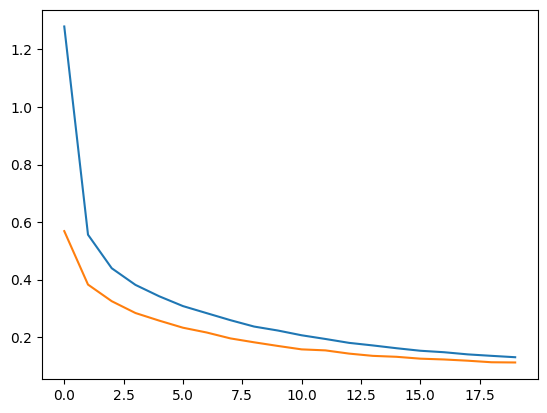

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

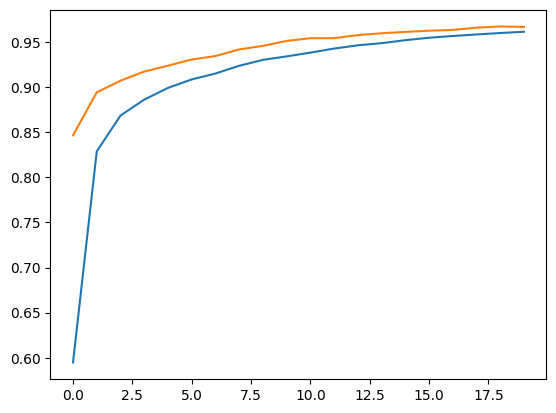

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

1/1 [==============================] - 0s 25ms/step
Predicted digit: 2


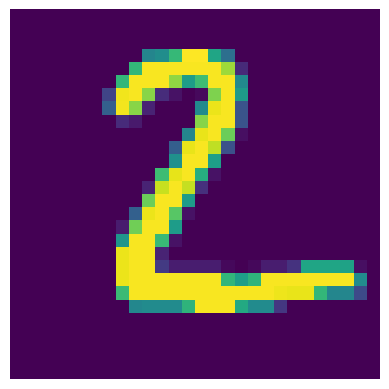

In [55]:
#actual digit
plt.imshow(X_test[1])
plt.axis('off')
#predicted digit by model
prediction = model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)
print("Predicted digit:", prediction[0])
